# Algorithm


-->Load DNA Data
-->Analyse the Data
-->Preprocess Data
-->Split Data into Train and Test Sets
-->Extract Features
-->Build Prediction Model with Training Data
-->Test Model with Test Data
-->Analyze Results





# Load DNA Data

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

mouse_nonpromoter = pd .read_table('D:/dataset/mm_nonpromoter_TA.txt')
mouse_promoter = pd .read_table('D:/dataset/mm_promoter_TA.txt')

In [59]:
mouse_promoter=mouse_promoter.drop(mouse_promoter[mouse_promoter.sequence.str.contains(r'[^0-9a-zA-Z]')].index)
mouse_promoter["class"]=1


In [60]:
mouse_nonpromoter=mouse_nonpromoter.drop(mouse_nonpromoter[mouse_nonpromoter.sequence.str.contains(r'[^0-9a-zA-Z]')].index)
mouse_nonpromoter["class"]=0


In [61]:
chim_dna=mouse_promoter
chum_dna=mouse_nonpromoter

In [62]:
marks_list = chim_dna['sequence'].tolist()
new_list = [''.join(marks_list[i:i+5]) for i in range(0, len(marks_list), 5)]

df1 = pd.DataFrame(new_list, columns=['sequence'])
df1.head()
df1["class"]=0
df1.head()

,sequence,class
0,AAAAAGAAAAATGCTTTTCAAAATTCTTATAGAATCACAAATTTCA...,0
1,AGTTGTACTACGGAAACGCGGACGCCCCTGTAGCAAGAATATTTGT...,0
2,TCCAACCTATGCCTCATGTGTGAAACCGTGAAGTCTTGAGAAAGCC...,0
3,GTAAGAACCGCCTAGCCGCAGCGCCAAAGGCGTAGCGTCGCACTCC...,0
4,TGCAAAGGATAGGGGCCAGCCTAGAGAGCCAGAAACCAACCACTGG...,0


In [64]:
marks_list1 = chum_dna['sequence'].tolist()
new_list = [''.join(marks_list1[i:i+5]) for i in range(0, len(marks_list1), 5)]
print(new_list[0])
df2 = pd.DataFrame(new_list, columns=['sequence'])
df2['class']=1


GCCCTGCTGGGCTTCGAGAAGCGCTTCATCCCCAGCCAGCACTATGTGAGTAGCCTAAGAGTGCCCTGCAGGAGCGCATAGTGGGGACAGTGCTATCACTCTGCTGCTACCCAAAAACCACCTGGACCAGGGAAGGAGATGAGAGGAAGGGAGACCAGGGAAGGATGTGAGGGGAAGGGGGACCAGGGGAGGATATGGGGGGAGGGGTCCAGGGGAGGATATGAGGGGGAGGGGGACCAAGGGAAGGATGTGAGAGGGAGGGGGATCAGGGGAGGATATGGGGGGAGGGAGAACAGGGGA


In [66]:

human_dna = pd.concat([df1,df2])

huma_dna = human_dna.sample(frac = 1)

# Analyse the data

Text(0.5, 1.0, 'Class distribution of Mouse Promoter and Non-Promoter')

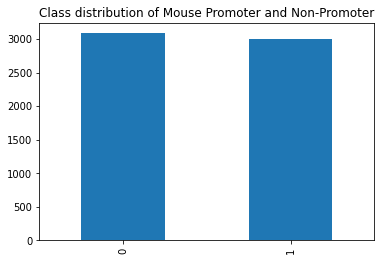

In [67]:
human_dna['sequence']=human_dna['sequence'].replace('\t', '', regex=True)
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Mouse Promoter and Non-Promoter")

# Preprocessing

In [47]:

def Kmers_funct(seq, size=3):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [29]:
human_dna.head()

,sequence,class
0,AAAAAGAAAAATGCTTTTCAAAATTCTTATAGAATCACAAATTTCA...,0
1,AGTTGTACTACGGAAACGCGGACGCCCCTGTAGCAAGAATATTTGT...,0
2,TCCAACCTATGCCTCATGTGTGAAACCGTGAAGTCTTGAGAAAGCC...,0
3,GTAAGAACCGCCTAGCCGCAGCGCCAAAGGCGTAGCGTCGCACTCC...,0
4,TGCAAAGGATAGGGGCCAGCCTAGAGAGCCAGAAACCAACCACTGG...,0


In [48]:
human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

In [13]:
human_dna.head()

,class,words
0,0,"[gcc, ccc, cct, ctg, tgc, gct, ctg, tgg, ggg, ..."
1,0,"[agg, gga, gag, agg, ggc, gca, caa, aag, agg, ..."
2,0,"[cag, agg, ggg, ggc, gcc, cct, ctc, tct, ctc, ..."
3,0,"[tca, cag, agg, ggt, gta, taa, aag, agt, gtc, ..."
4,0,"[ttg, tga, gag, agg, ggt, gtt, ttc, tcc, ccg, ..."


In [49]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
print(human_texts[0])


aaa aaa aaa aag aga gaa aaa aaa aaa aat atg tgc gct ctt ttt ttt ttc tca caa aaa aaa aat att ttc tct ctt tta tat ata tag aga gaa aat atc tca cac aca caa aaa aat att ttt ttc tca cat atg tga gaa aag agg gga gag agg ggg ggg ggg gga gac aca cac aca cac aca cac aca cac aca cat ata tac aca cag agc gcc cct ctg tgt gtg tga gaa aag agg gga gag aga gag aga gag agg gga gat ata tat ata tat atg tgg gga gaa aag agg gga gag aga gag aga gag agg ggt gta taa aaa aag aga gag agg gga gaa aag agt gta tat ata tat atc tct ctt tta taa aag aga gat atc tca caa aag agt gtt ttt ttc tca cac aca cat ata taa aat atg tgc gcc cca cag aga gat ata tat ata tat att tta tag agc gca cat ata tat ata tac act ctg tgg ggt gta tag agg gga gat att tta tat atc tct ctt ttt ttt ttc tcc ccc ccc ccg cgc gcc cct cta tac aca caa aaa aat ata tag agc gcc cct cta taa aag agc gca cac acc ccc cct ctc tcc cca cag agt gtc tca cat ata taa aaa aaa aaa aat atc tca cag aga gag aga gag aga gaa aag agt gta taa aag agc gct ctg tga gaa aac aca cag agc 

In [51]:
y_human = human_dna.iloc[:, 0].values
y_human


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Feature Extraction

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(human_texts)

In [18]:
print(X.shape)

(29225, 234692)


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_human, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted    0    1
Actual             
0          502  137
1          140  438
accuracy = 0.772 
precision = 0.772 
recall = 0.772 
f1 = 0.772


In [114]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [115]:
y_pred = classifier.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted    0    1
Actual             
0          451  153
1          126  439
accuracy = 0.761 
precision = 0.762 
recall = 0.761 
f1 = 0.761


In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted    0    1
Actual             
0          527  112
1          105  473
accuracy = 0.822 
precision = 0.822 
recall = 0.822 
f1 = 0.822


In [ ]:
https://github.com/mldlproject/2022-iPromoter-Seqvec/blob/main/data_processing/sequence_process.py
    iPromoter-Seqvec: identifying promoters using bidirectional long short-term memory and sequence-embedded features